# Il teorema di Bayes {#sec-bayes_theorem}

> It is, without exaggeration, perhaps the most important single equation in history.
>
> Tom Chivers (2024)

**Prerequisiti**

- Leggere *Everything is Predictable: How Bayesian Statistics Explain Our World* [@chivers2024everything]. Questo libro offre una descrizione chiara e accessibile dell'impatto che il teorema di Bayes ha avuto sulla vita moderna.
- Leggere [Bayesian Models of Cognition](https://oecs.mit.edu/pub/lwxmte1p/release/2) di Thomas L. Griffiths, una voce della [Open Encyclopedia of Cognitive Science](https://oecs.mit.edu).

**Concetti e competenze chiave**

- Capire in profondità il teorema di Bayes e la sua importanza.
- Utilizzare il teorema di Bayes per analizzare e interpretare i test diagnostici, tenendo in considerazione la prevalenza della malattia in questione.
- Affrontare e risolvere problemi di probabilità discreta che necessitano dell'applicazione del teorema di Bayes.

**Preparazione del Notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import matplotlib.patches as patches

In [2]:
seed: int = sum(map(ord, "bayes_theorem"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Il teorema di Bayes offre una soluzione ottimale ai problemi induttivi, che spaziano dall'identificazione della struttura tridimensionale del mondo basata su dati sensoriali limitati, all'inferenza dei pensieri altrui a partire dal loro comportamento. Questa regola si rivela particolarmente utile in situazioni in cui i dati osservati sono insufficienti per distinguere in modo definitivo tra diverse ipotesi.

Nonostante ciò, tutte le previsioni basate su questo metodo mantengono un certo grado di incertezza. Anche se l'universo fosse completamente deterministico, la nostra conoscenza di esso rimarrebbe imperfetta: non possiamo conoscere la posizione e lo stato di ogni singola particella che lo compone. Le informazioni a nostra disposizione sono inevitabilmente parziali e imprecise, ottenute attraverso i nostri sensi limitati.

La vita reale non è paragonabile a una partita di scacchi, un gioco con informazioni perfette che può essere "risolto" in linea di principio. Assomiglia piuttosto al poker, dove le decisioni vengono prese utilizzando le informazioni limitate a disposizione dei giocatori. Questo capitolo si concentra sull'equazione che ci permette di fare proprio questo: il teorema di Bayes. Esso descrive come modifichiamo le nostre convinzioni riguardo a un'ipotesi in una situazione in cui i dati disponibili non consentono una decisione certa.

Questo processo è noto come inferenza induttiva, che ci permette di trarre conclusioni generali da dati specifici e limitati. Il teorema di Bayes fornisce quindi un framework matematico per aggiornare le nostre credenze alla luce di nuove evidenze, permettendoci di prendere decisioni informate in un mondo caratterizzato dall'incertezza.

# Una Rivoluzione nel Pensiero Probabilistico

Nel cuore del XVIII secolo, un ecclesiastico presbiteriano di nome Thomas Bayes gettò le basi per una delle più importanti rivoluzioni nel campo della statistica e del calcolo delle probabilità. Il suo contributo, noto oggi come teorema di Bayes, non solo ha trasformato il modo in cui comprendiamo e applichiamo la probabilità, ma continua a influenzare profondamente la scienza moderna e la tecnologia, inclusa l'intelligenza artificiale [@chivers2024everything].

Thomas Bayes nacque in una famiglia benestante e ricevette un'educazione di alto livello, studiando teologia a Edimburgo per prepararsi alla vita da ecclesiastico. Come nota il suo biografo Bellhouse, Bayes "non sembrava un accademico moderno. Era più un dilettante, un virtuoso. Lo faceva per il proprio piacere piuttosto che avere un'agenda di ricerca."

Bayes pubblicò due opere principali durante la sua vita:

1. Una di teologia, "Divine benevolence: Or, an attempt to prove that the principal end of the divine providence and government is the happiness of his creatures", nel 1731.
2. Una difesa del calcolo newtoniano, "An Introduction to the Doctrine of Fluxions", in risposta a una critica del filosofo George Berkeley.

Tuttavia, fu il suo lavoro postumo, "An Essay towards Solving a Problem in the Doctrine of Chances", pubblicato nel 1763 nella rivista *Philosophical Transactions*, a cambiare per sempre il corso della teoria della probabilità.

Bellhouse nota che l'interesse di Bayes per la matematica era tipico del suo tempo: "Nel XVIII secolo, i ricchi si dedicavano alla scienza. È un po' come i ricchi di oggi che si dedicano agli sport." Ma forse Bellhouse si riferiva solo al suo tempo: oggi i ricchi sembrano interessarsi solo ai social media.

Il contributo di Bayes non fu tanto matematico quanto filosofico. David Spiegelhalter, ex presidente della Royal Statistical Society, spiega che per Bayes "la probabilità è un'espressione della nostra mancanza di conoscenza sul mondo." Questa visione introduce l'idea rivoluzionaria che la probabilità sia soggettiva, un'espressione della nostra conoscenza limitata e delle nostre supposizioni sulla verità, piuttosto che una proprietà oggettiva della realtà.

Per illustrare questo concetto, Bayes utilizzò l'esempio di un tavolo nascosto alla vista su cui vengono lanciate delle palle. Una palla bianca viene lanciata in modo tale che la sua posizione finale sia completamente casuale. Quando la palla bianca si ferma, viene rimossa e si traccia una linea sul tavolo nel punto in cui si trovava. La posizione della linea non è nota. Successivamente, un certo numero di palle rosse viene lanciato sul tavolo. Viene comunicato solo quante palle si trovano a sinistra della linea e quante a destra. Il compito è stimare la posizione della linea. La soluzione proposta da Bayes utilizza non solo i dati osservati (il numero di palle rosse a sinistra e a destra della linea), ma anche le convinzioni iniziali (il "prior").

Richard Price (1723-1791), un altro ecclesiastico nonconformista, ebbe un ruolo cruciale nella diffusione del lavoro di Thomas Bayes. Molto più noto del suo amico, Price era ben inserito nei circoli intellettuali dell'epoca. Era in contatto con diversi Padri Fondatori della Rivoluzione Americana, tra cui Thomas Jefferson e Benjamin Franklin, così come John Adams, il secondo presidente degli Stati Uniti. Supportava attivamente la rivoluzione americana, pubblicando un influente opuscolo *Observations on the Nature of Civil Liberty, the Principles of Government, and the Justice and Policy of the War with America* nel 1776. Era amico di filosofi come David Hume e Adam Smith.

Price è importante in questa storia come colui che portò all'attenzione pubblica il lavoro di Bayes: mostrò il saggio al fisico John Canton nel 1761, dopo la morte di Bayes, e lo fece pubblicare nelle *Philosophical Transactions* della Royal Society due anni dopo. Parte del motivo per cui ci volle tanto tempo per pubblicarlo era che Price non si limitò a correggere refusi e virgole fuori posto. Price aveva una visione propria del lavoro: mentre Bayes scrisse la prima metà del saggio, la seconda metà, contenente tutte le possibili applicazioni pratiche del teorema, fu tutta opera di Price. Bayes non aveva interesse per le statistiche applicate: il suo lavoro, in questo e in tutti gli altri articoli, era "tutta teoria senza alcun accenno di applicazione." Ma Price fu -- come dice lo storico della statistica Stephen Stigler -- "il primo bayesiano."

Sebbene il lavoro di Bayes sia rimasto nell'ombra per decenni, con Pierre-Simon Laplace che giunse indipendentemente a conclusioni simili nel 1774 e le espanse nella sua "Théorie analytique des probabilités" del 1812, l'importanza del teorema di Bayes è oggi indiscutibile. Esso fornisce un meccanismo matematico per aggiornare le probabilità di un'ipotesi in base a nuove evidenze, riflettendo un approccio dinamico e iterativo alla conoscenza.

Nel panorama contemporaneo, il teorema di Bayes trova applicazioni in ogni campo della scienza e della tecnologia. È particolarmente rilevante nel campo dell'intelligenza artificiale, dove modelli linguistici avanzati come ChatGPT e Claude utilizzano principi bayesiani per fare previsioni e prendere decisioni.

In conclusione, il teorema di Bayes, nato dalle riflessioni di un ministro presbiteriano del XVIII secolo, ha trasformato il nostro modo di comprendere la probabilità e di aggiornare le nostre conoscenze. La sua rilevanza universale nella comprensione e previsione dei fenomeni è tale che, come afferma Brian Clegg nel suo libro "Everything is predictable: how bayesian statistics explain our world", la statistica bayesiana è diventata uno strumento fondamentale per spiegare il nostro mondo [@chivers2024everything].

## Spiegazione del Teorema di Bayes

Prima di approfondire gli aspetti matematici del teorema di Bayes, consideriamone il significato. Sebbene il teorema di Bayes sia un risultato apparentemente semplice della teoria della probabilità (la sua derivazione sarà trattata nella sezione successiva), l'interpretazione soggettiva della probabilità proposta da Bayes e Price eleva questa semplice formula di probabilità condizionata a un potente metodo per descrivere come un agente razionale aggiorni le proprie convinzioni su un'ipotesi alla luce di nuovi dati.

Consideriamo un'ipotesi $H_i$ all'interno di un insieme di ipotesi $\mathcal{H}$. Il grado di convinzione attribuito all'ipotesi prima di osservare qualsiasi dato è indicato come $P(H_i)$, noto come probabilità a priori. Dopo aver osservato i dati $O$, il grado di convinzione aggiornato è $P(H_i \mid O)$, chiamato probabilità a posteriori, che rappresenta la probabilità di $H_i$ tenendo conto delle informazioni fornite da $O$. Il teorema di Bayes applica la definizione di probabilità condizionata per fornire:

$$
P(H_i \mid O) = \frac{P(O \mid H_i)P(H_i)}{\sum_{j=1}^{\infty}P(O \mid H_j)P(H_j)},
$$

dove $P(O \mid H_i)$ è la probabilità di osservare $O$ se $H_i$ fosse vera, nota come verosimiglianza. La somma al denominatore aggrega lo stesso prodotto (la probabilità a priori e la verosimiglianza) su tutte le ipotesi in $\mathcal{H}$, garantendo che la probabilità a posteriori $P(H_i \mid O)$ sommi a 1 su tutte le ipotesi. Il numeratore è cruciale nel teorema di Bayes, indicando che la nostra convinzione in un'ipotesi dopo aver osservato i dati dovrebbe riflettere il prodotto della probabilità a priori di quell'ipotesi e della probabilità dei dati se quell'ipotesi fosse vera.

Intuitivamente, il teorema di Bayes afferma che le nostre convinzioni sulle ipotesi dovrebbero basarsi su due fattori: la plausibilità delle ipotesi (rappresentata dalla probabilità a priori) e la loro compatibilità con i dati osservati (rappresentata dalla verosimiglianza). Questi due fattori contribuiscono in modo uguale e moltiplicativo: se uno dei due è molto piccolo, l'altro deve essere molto grande per compensare.

## Derivazione

Deriviamo il teorema di Bayes nella situazione più semplice, ovvero quella in cui lo spazio di tutte le ipotesi possibili $\mathcal{H}$ è costituito da sole due ipotesi, che possiamo concepire come eventi distinti e mutualmente esclusivi che costituiscono una partizione di $\mathcal{H}$, denominate ipotesi $H_1$ e $H_2$. Supponiamo di avere già una certa comprensione di queste ipotesi, espressa attraverso le loro probabilità a priori $P(H_1)$ e $P(H_2)$. A questo punto, introduciamo un nuovo evento, l'osservazione $O$, la cui occorrenza è accompagnata da una probabilità non nulla e per il quale conosciamo le probabilità condizionate $P(O \mid H_1)$ e $P(O \mid H_2)$, che indicano quanto sia probabile osservare $O$ assumendo che una delle due ipotesi sia vera. Se $O$ si verifica, siamo interessati a determinare le probabilità a posteriori $P(H_1 \mid O)$ e $P(H_2 \mid O)$ delle nostre ipotesi alla luce di questa nuova evidenza.

La seguente illustrazione rappresenta la suddivisione dello spazio totale delle ipotesi $\mathcal{H}$ nelle ipotesi $H_1$ e $H_2$, con l'evento corrispondente all'osservazione $O$ posizionata all'interno di questo spazio.

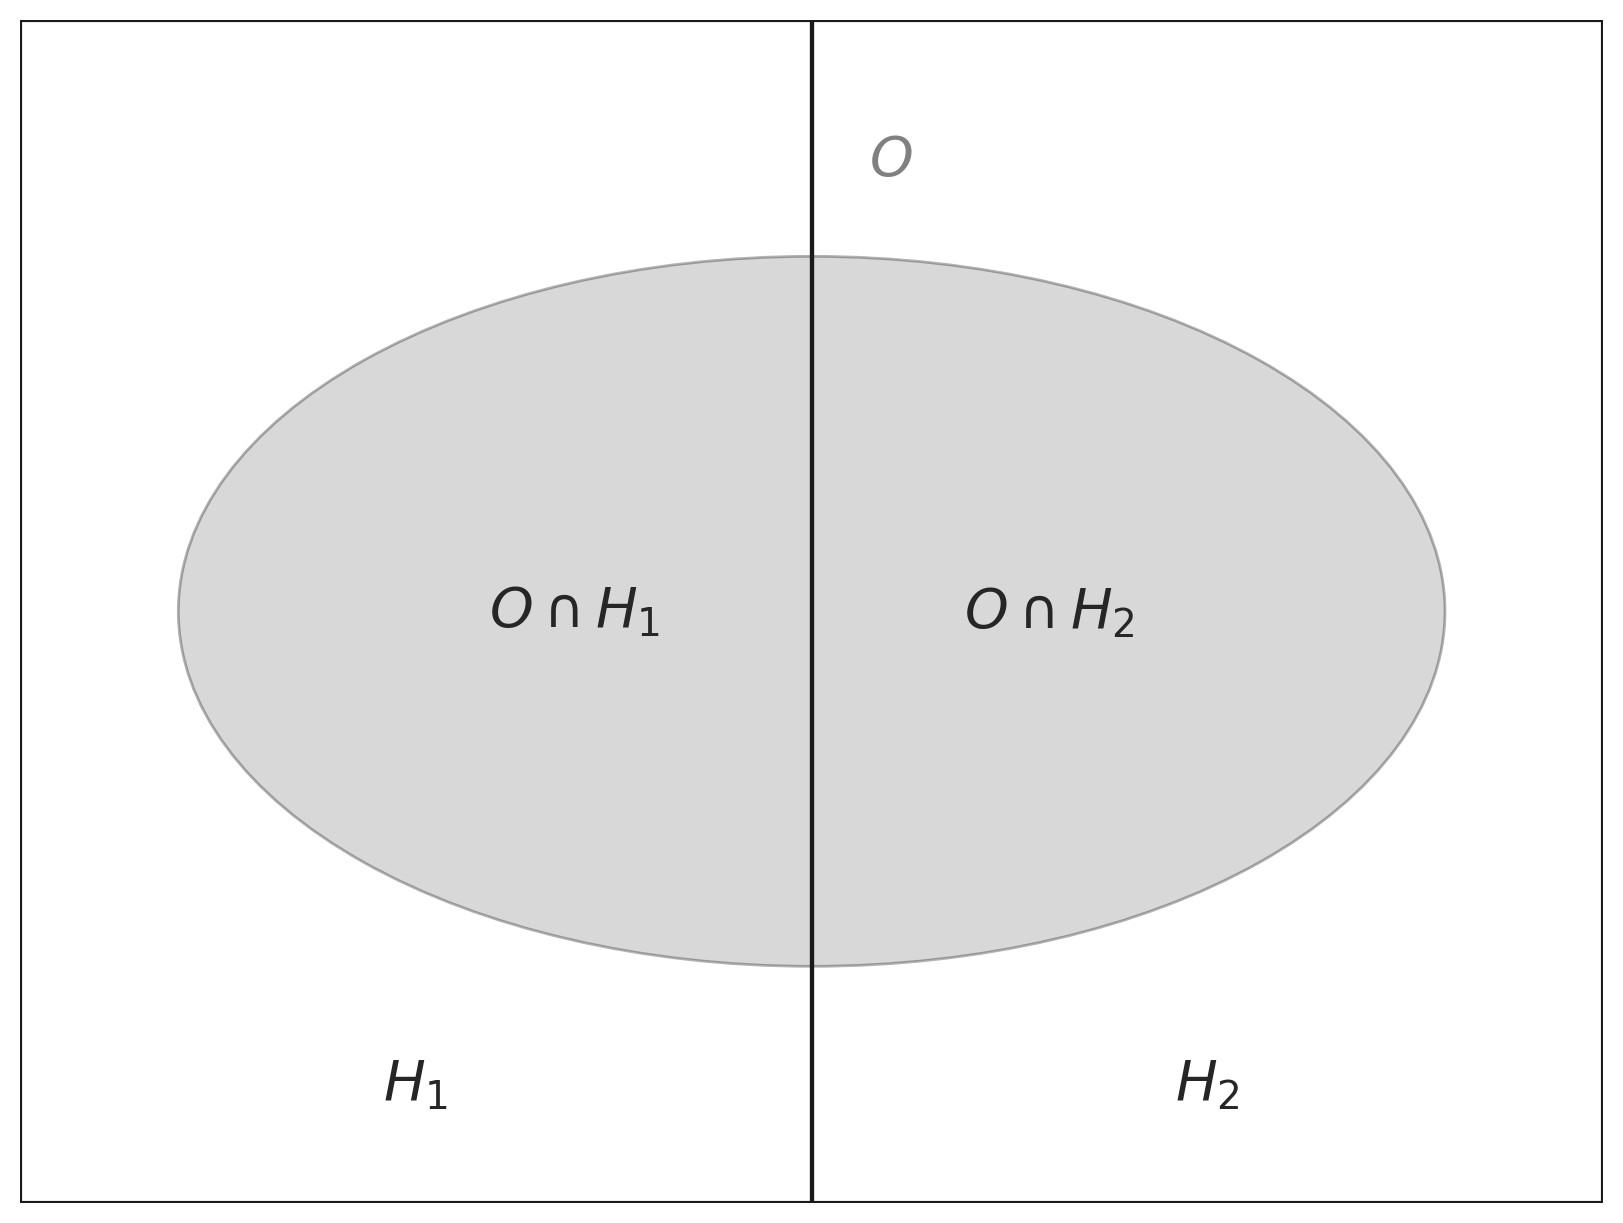

In [3]:
#| echo: false

fig, ax = plt.subplots(figsize=(8, 6))

# Disegno dei rettangoli H1 e H2
ax.plot([0, 0, 0.5, 0.5, 0], [0, 1, 1, 0, 0], "k")
ax.plot([0.5, 0.5, 1, 1, 0.5], [0, 1, 1, 0, 0], "k")

# Testo delle regioni H1 e H2
ax.text(
    0.25,
    0.1,
    "$H_1$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
)
ax.text(
    0.75,
    0.1,
    "$H_2$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
)

# Disegno dell'ellisse O
ellipse = patches.Ellipse(
    (0.5, 0.5), 0.8, 0.6, edgecolor="black", facecolor="gray", alpha=0.3
)
ax.add_patch(ellipse)

# Testo delle regioni di intersezione
ax.text(
    0.35,
    0.5,
    "$O \\cap H_1$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
)
ax.text(
    0.65,
    0.5,
    "$O \\cap H_2$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
)

# Testo dell'ellisse O
ax.text(
    0.55,
    0.88,
    "$O$",
    horizontalalignment="center",
    verticalalignment="center",
    fontsize=20,
    color="gray",
)

# Impostazioni finali
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

plt.show()

Per calcolare la probabilità a posteriori dell'ipotesi $H_1$ data l'osservazione di $O$, utilizziamo la formula:

$$
P(H_1 \mid O) = \frac{P(O \cap H_1)}{P(O)}.
$$

Questo calcolo può essere semplificato sfruttando la definizione di probabilità condizionata, che ci permette di sostituire $P(O \cap H_1)$ con $P(O \mid H_1)P(H_1)$. Applicando questa sostituzione, otteniamo:

$$
P(H_1 \mid O) = \frac{P(O \mid H_1) P(H_1)}{P(O)}.
$$

Dato che $H_1$ e $H_2$ si escludono a vicenda, la probabilità totale di $O$ può essere espressa come la somma delle probabilità di $O$ occorrente in concomitanza con ciascuna ipotesi, utilizzando il teorema della probabilità totale:

$$
P(O) = P(O \mid H_1)P(H_1) + P(O \mid H_2)P(H_2).
$$

Incorporando questi valori nella formula di Bayes, giungiamo a:

$$
P(H_1 \mid O) = \frac{P(O \mid H_1)P(H_1)}{P(O \mid H_1)P(H_1) + P(O \mid H_2)P(H_2)}.
$$ {#eq-bayes1}

Questa espressione costituisce l'essenza della formula di Bayes per il caso semplificato in cui le ipotesi si limitano a due eventi mutualmente esclusivi, $H_1$ e $H_2$.

La stessa derivazione può essere presentata in forma visiva nel modo seguente. 

![Derivazione visiva del teorema di Bayes (immagine ricavata da X).](../../figures/bayes_theorem_visual.png){ width=75% }


Nel quadro delle probabilità discrete, questa formula può essere generalizzata per accogliere un insieme più ampio di ipotesi che formano una partizione completa dello spazio degli eventi $\mathcal{H}$, dove ogni $O$ rappresenta un evento con probabilità maggiore di zero. Per ogni ipotesi $H_i$ all'interno di un insieme numerabile, la formula di Bayes si estende come segue:

$$
P(H_i \mid O) = \frac{P(O \mid H_i)P(H_i)}{\sum_{j=1}^{\infty}P(O \mid H_j)P(H_j)}.
$$ {#eq-bayes2}

Qui, il denominatore agisce come un fattore di normalizzazione che integra i prodotti delle probabilità a priori e delle verosimiglianze associate a ogni ipotesi considerata.

Per variabili continue, la formula di Bayes assume una forma integrale, adattandosi a situazioni in cui le ipotesi $H_i$ rappresentano valori in un continuum. In questo contesto, la formula diventa

$$
P(H_i \mid O) = \frac{P(O \mid H_i) \cdot P(H_i)}{\int P(O \mid H) \cdot P(H) \, dH}
$$ {#eq-bayes-cont}

e consente di aggiornare le probabilità a posteriori di ipotesi continue basate su nuove evidenze.

In sintesi, la formula di Bayes si articola in tre elementi fondamentali:

- **Probabilità a Priori, $P(H_i)$**: Questa componente riflette la nostra valutazione preliminare riguardo la verosimiglianza dell'ipotesi $H_i$ prima di prendere in esame nuove evidenze $O$. Essa incarna il livello di credibilità o fiducia attribuita all'ipotesi, basandosi su conoscenze preesistenti. In sostanza, la probabilità a priori quantifica le nostre convinzioni pregresse o le aspettative iniziali su quanto sia probabile che l'ipotesi $H_i$ sia vera.
- **Probabilità a Posteriori, $P(H_i \mid O)$**: Questo valore aggiorna la nostra fiducia nell'ipotesi $H_i$ in seguito all'osservazione dell'evidenza $O$. Rappresenta il livello di convinzione ricalibrato in $H_i$ dopo aver considerato l'evidenza $O$. La formula di Bayes ci offre un metodo per modulare questa probabilità alla luce delle nuove informazioni ricevute.
- **Verosimiglianza, $P(O \mid H_i)$**: La verosimiglianza esprime la probabilità di rilevare l'evidenza $O$ dato che l'ipotesi $H_i$ sia vera. È un indice di quanto l'evidenza supporti o confermi l'ipotesi $H_i$. Un valore elevato di verosimiglianza indica che l'evidenza è fortemente in linea o prevista dalla veridicità dell'ipotesi.

Grazie alla formula di Bayes, possiamo adottare un processo di aggiornamento continuo delle nostre credenze in base a nuove informazioni, promuovendo un metodo dinamico per navigare tra conoscenza e incertezza. Questa metodologia ci fornisce un approccio strutturato per rivedere e adattare le nostre convinzioni riguardo l'ipotesi $H_i$ di fronte a nuove evidenze $O$. La capacità di rielaborare costantemente le nostre aspettative in funzione di informazioni aggiuntive ci consente di prendere decisioni più informate, di interpretare con maggiore precisione i dati disponibili e di affinare le nostre previsioni e comprensioni del mondo circostante.

## Alcuni esempi

::: {#exm-2}
Il modo più comune per spiegare il teorema di Bayes è attraverso i test medici. Prendiamo come esempio la mammografia e la diagnosi del cancro al seno.

Supponiamo di avere un test di mammografia con una sensibilità del 90% e una specificità del 90%. Questo significa che:

- In presenza di cancro al seno, la probabilità che il test lo rilevi correttamente è del 90%.
- In assenza di cancro al seno, la probabilità che il test confermi correttamente l'assenza della malattia è del 90%.

In altri termini, il test ha un tasso di falsi negativi del 10% e un tasso di falsi positivi anch'esso del 10%.

Definiamo due ipotesi:

1. $M^+$: presenza della malattia
2. $M^-$: assenza della malattia

L'evidenza è rappresentata dal risultato positivo di un test di mammografia, che indichiamo con $T^+$.

Applicando il teorema di Bayes, possiamo calcolare la probabilità di avere il cancro al seno dato un risultato positivo al test, come segue:

$$
P(M^+ \mid T^+) = \frac{P(T^+ \mid M^+) \cdot P(M^+)}{P(T^+ \mid M^+) \cdot P(M^+) + P(T^+ \mid M^-) \cdot P(M^-)},
$$

dove:

- $P(M^+ \mid T^+)$ è la probabilità di avere il cancro ($M^+$) dato un risultato positivo al test ($T^+$).
- $P(T^+ \mid M^+)$ rappresenta la sensibilità del test, ovvero la probabilità che il test risulti positivo in presenza effettiva del cancro. In questo caso, è pari a 0.90.
- $P(M^+)$ è la probabilità a priori che una persona abbia il cancro, ovvero la prevalenza della malattia nella popolazione.
- $P(T^+ \mid M^-)$ indica la probabilità di un falso positivo, cioè la probabilità che il test risulti positivo in assenza di cancro. Con una specificità del 90%, questa probabilità si calcola come:

  $$
  P(T^+ \mid M^-) = 1 - \text{Specificità} = 1 - 0.90 = 0.10
  $$

  Questo significa che c'è una probabilità del 10% che il test diagnostichi erroneamente la presenza del cancro in una persona sana.

- $P(M^-)$ è la probabilità a priori che una persona non sia affetta da cancro prima di effettuare il test.

Questa formulazione del teorema di Bayes ci permette di calcolare la probabilità effettiva di avere il cancro al seno, dato un risultato positivo al test di mammografia, tenendo conto sia della sensibilità e specificità del test, sia della prevalenza della malattia nella popolazione.

Inserendo nella formula i del problema, otteniamo:

$$
\begin{align}
P(M^+ \mid T^+) &= \frac{0.9 \cdot 0.01}{0.9 \cdot 0.01 + 0.1 \cdot 0.99} \notag\\
&= \frac{9}{108} \notag\\
&\approx 0.083.\notag
\end{align}
$$

Questo calcolo dimostra che, considerando una mammografia con risultato positivo ottenuto tramite un test con una sensibilità del 90% e una specificità del 90%, la probabilità che il paziente sia effettivamente affetto da cancro al seno è solo dell'8.3%.
:::

### Il Valore Predittivo di un Test di Laboratorio

Per semplicità, possiamo riscrivere il teorema di Bayes in due modi distinti per calcolare ciò che viene chiamato valore predittivo del test positivo e valore predittivo del test negativo.

La comprensione di tre elementi è fondamentale per questo calcolo: la prevalenza della malattia, la sensibilità e la specificità del test.

- **Prevalenza:** Si riferisce alla percentuale di individui in una popolazione affetti da una certa malattia in un determinato momento. Viene espressa come percentuale o frazione della popolazione. Per esempio, una prevalenza dello 0,5% indica che su mille persone, cinque sono affette dalla malattia.

- **Sensibilità:** Indica la capacità del test di identificare correttamente la malattia negli individui malati. Viene calcolata come la frazione di veri positivi (individui malati correttamente identificati) sul totale degli individui malati. La formula della sensibilità ($Sens$) è la seguente:

    $$ \text{Sensibilità} = \frac{TP}{TP + FN}, $$

    dove $TP$ rappresenta i veri positivi e $FN$ i falsi negativi. Pertanto, la sensibilità misura la probabilità che il test risulti positivo se la malattia è effettivamente presente.

- **Specificità:** Misura la capacità del test di riconoscere gli individui sani, producendo un risultato negativo per chi non è affetto dalla malattia. Si calcola come la frazione di veri negativi (individui sani correttamente identificati) sul totale degli individui sani. La specificità ($Spec$) si definisce come:

    $$ \text{Specificità} = \frac{TN}{TN + FP}, $$

    dove $TN$ sono i veri negativi e $FP$ i falsi positivi. Così, la specificità rappresenta la probabilità che il test risulti negativo in assenza della malattia.

Questa tabella riassume la terminologia:

|       | $T^+$                                              | $T^-$                                              | Totale              |
| :---: | :------------------------------------------------: | :------------------------------------------------: | :------------------:|
| $M^+$ | $P(T^+ \cap M^+)$ <br> (Sensibilità)               | $P(T^- \cap M^+)$ <br> (1 - Sensibilità)           | $P(M^+)$            |
| $M^-$ | $P(T^+ \cap M^-)$ <br> (1 - Specificità)           | $P(T^- \cap M^-)$ <br> (Specificità)               | $P(M^-)$            |
| Totale| $P(T^+)$                                           | $P(T^-)$                                           | 1                   |

dove $T^+$ e $T^-$ indicano rispettivamente un risultato positivo o negativo del test, mentre $M^+$ e $M^-$ la presenza o assenza effettiva della malattia. In questa tabella, i totali marginali rappresentano:

- **Totale per $M^+$ e $M^-$** (ultima colonna): La probabilità totale di avere la malattia ($P(M^+)$) e la probabilità totale di non avere la malattia ($P(M^-)$), rispettivamente. Questi valori sono calcolati sommando le probabilità all'interno di ciascuna riga.
- **Totale per $T^+$ e $T^-$** (ultima riga): La probabilità totale di un risultato positivo al test ($P(T^+)$) e la probabilità totale di un risultato negativo al test ($P(T^-)$), rispettivamente. Questi valori sono calcolati sommando le probabilità all'interno di ciascuna colonna.
- **Totale generale** (angolo in basso a destra): La somma di tutte le probabilità, che per definizione è 1, rappresentando l'intera popolazione o il set di casi considerati.

Mediante il teorema di Bayes, possiamo usare queste informazioni per stimare la probabilità post-test di avere o non avere la malattia basandoci sul risultato del test.

Il **valore predittivo positivo** (VPP) del test, cioè la probabilità post-test che un individuo sia malato dato un risultato positivo del test, è calcolato come:

$$
P(M^+ \mid T^+) = \frac{P(T^+ \mid M^+) \cdot P(M^+)}{P(T^+ \mid M^+) \cdot P(M^+) + P(T^+ \mid M^-) \cdot P(M^-)}.
$$

ovvero,

$$ VPP = \frac{(\text{Sensibilità} \times \text{Prevalenza})}{(\text{Sensibilità} \times \text{Prevalenza}) + (1 - \text{Specificità}) \times (1 - \text{Prevalenza})} $$

Analogamente, il **valore predittivo negativo** (VPN), che è la probabilità che un individuo non sia malato dato un risultato negativo del test, si calcola come:

$$
P(M^- \mid T^-) = \frac{P(T^- \mid M^-) \cdot (1 - P(M^+))}{P(T^- \mid M^-) \cdot (1 - P(M^+)) + P(T^- \mid M^+) \cdot P(M^+)}.
$$

ovvero,

$$ NPV = \frac{\text{Specificità} \cdot (1 - \text{Prevalenza})}{\text{Specificità} \cdot (1 - \text{Prevalenza}) + (1 - \text{Sensibilità}) \cdot \text{Prevalenza}}. $$

::: {#exm-3}

Implementiamo le formule del valore predittivo positivo e del valore predittivo negativo del test in Python e usiamo gli stessi dati dell'esercizio precedente.

In [ ]:
def positive_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))

In [6]:
def negative_predictive_value_of_diagnostic_test(sens, spec, prev):
    return (spec * (1 - prev)) / (spec * (1 - prev) + (1 - sens) * prev)

Inseriamo i dati del problema.

In [7]:
sens = 0.9  # sensibilità
spec = 0.9  # specificità
prev = 0.01  # prevalenza

Il valore predittivo del test positivo è:

In [8]:
res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.083


Il valore predittivo del test negativo è:

In [9]:
res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


:::

::: {#exm-3a}

La simulazione seguente ha lo scopo di aiutare a visualizzare il teorema di Bayes, utilizzando come esempio gli stessi dati della mammografia che abbiamo analizzato in precedenza.

In [17]:
# Parametri
sensitivity = 0.90  # Sensibilità del test (P(T+ | M+))
specificity = 0.90  # Specificità del test (P(T- | M-))
prev_cancer = 0.01  # Prevalenza (P(M+))

# La simulazione considera una popolazione di 100_000 persone.
N_mammography = 100_000

# Si genera un campione casuale di 100.000 persone, dove ogni persona viene
# etichettata come "Cancer" (cancro) o "Healthy" (sana), sulla base della
# prevalenza definita (1% per il cancro, 99% per i sani).
# np.random.choice sceglie tra le due opzioni ("Cancer", "Healthy") per ogni persona,
# con una probabilità di 0.01 per il cancro e 0.99 per essere sani.
outcome_mammography = np.random.choice(
    ["Cancer", "Healthy"], N_mammography, p=[prev_cancer, 1 - prev_cancer]
)

# Conteggio delle persone con e senza cancro.
# N_C: numero di persone con cancro nella simulazione.
# N_H: numero di persone sane nella simulazione.
N_C = np.sum(outcome_mammography == "Cancer")
N_H = np.sum(outcome_mammography == "Healthy")

# Si inizializza un array vuoto per memorizzare i risultati del test
# (positivo "+" o negativo "-").
test_mammography = np.empty(N_mammography, dtype=str)

# Per le persone con cancro, il risultato del test viene simulato utilizzando la
# sensibilità del test (90% positivo se hanno il cancro).
test_mammography[outcome_mammography == "Cancer"] = np.random.choice(
    ["+", "-"], N_C, p=[sensitivity, 1 - sensitivity]
)

# Per le persone sane, il risultato del test viene simulato utilizzando la
# specificità del test (90% negativo se sono sane).
test_mammography[outcome_mammography == "Healthy"] = np.random.choice(
    ["-", "+"], N_H, p=[specificity, 1 - specificity]
)

# Creazione di un DataFrame per memorizzare i risultati.
df_mammography = pd.DataFrame(
    {"outcome": outcome_mammography, "test": test_mammography}
)

# Creazione di una tabella di contingenza. La tabella di contingenza mostra 
# il numero di persone in ogni combinazione di esito (cancro o sano) e risultato 
# del test (positivo o negativo). Questa tabella fornisce il conteggio dei veri 
# positivi, falsi positivi, falsi negativi e veri negativi.
contingency_table_mammography = pd.crosstab(
    df_mammography["outcome"], df_mammography["test"]
)
contingency_table_mammography

test,+,-
outcome,,
Cancer,863,89
Healthy,9879,89169


In [18]:
# I risultati nella tabella di contingenza vengono usati per calcolare
# le probabilità sulla base della simulazione.

# Veri positivi (cancro e risultato positivo al test) 
true_positives = contingency_table_mammography.loc["Cancer", "+"]

# Falsi positivi (sani e risultato positivo al test) 
false_positives = contingency_table_mammography.loc["Healthy", "+"]

# Frequenza totale dei risultati positivi 
total_positives = true_positives + false_positives

# Applicazione del teorema di Bayes sui dati simulati 
P_M_given_T = true_positives / total_positives
P_M_given_T

0.08033885682368275

Utilizzando i dati della simulazione, la probabilità che una persona abbia il cancro al seno dato un risultato positivo al test è molto vicina al valore teorico calcolato in precedenza (circa 8.3%). Se eseguissimo la simulazione nuovamente, il valore ottenuto potrebbe variare leggermente a causa della casualità intrinseca nel campionamento. Tuttavia, ripetendo la simulazione molte volte, i risultati tenderanno a convergere verso il valore teorico, grazie alla legge dei grandi numeri. Questo conferma che il modello teorico è coerente con i risultati simulati.

:::

:::{#exm-hiv}

Poniamoci il problema di capire quanto sia affidabile un test per l'HIV. Per fare questo, utilizzeremo le seguenti informazioni [@petersen2024principles]:

- **Tasso di base dell'HIV (P(HIV))**: 0.3% (0.003). Questa è la probabilità che una persona nella popolazione generale abbia l'HIV.
- **Sensibilità del test (P(Test+ \mid HIV))**: 95% (0.95). Questa è la probabilità che il test risulti positivo se la persona ha effettivamente l'HIV.
- **Specificità del test (P(Test- \mid ¬HIV))**: 99.28% (0.9928). Questa è la probabilità che il test risulti negativo se la persona non ha l'HIV.

**Calcolo della probabilità di HIV dato un test positivo.**

Per calcolare la probabilità di avere l'HIV dato un test positivo (P(HIV \mid Test+)), utilizziamo il teorema di Bayes:

$$
P(HIV \mid Test+) = \frac{P(Test+ \mid HIV) \times P(HIV)}{P(Test+)}.
$$

Abbiamo bisogno di calcolare il denominatore, ovvero la probabilità complessiva di ottenere un test positivo (P(Test+)). Questo valore include sia i veri positivi che i falsi positivi:

$$
P(Test+) = P(Test+ \mid HIV) \times P(HIV) + P(Test+ \mid \neg HIV) \times P(\neg HIV),
$$

dove:

- $P(Test+ \mid \neg HIV) = 1 - P(Test- \mid \neg HIV) = 1 - 0.9928 = 0.0072$ (tasso di falsi positivi),
- $P(\neg HIV) = 1 - P(HIV) = 1 - 0.003 = 0.997$.

Calcoliamo $P(Test+)$:

$$
P(Test+) = (0.95 \times 0.003) + (0.0072 \times 0.997) \approx 0.010027.
$$

Ora possiamo calcolare $P(HIV \mid Test+)$:

$$
P(HIV \mid Test+) = \frac{0.95 \times 0.003}{0.010027} \approx 0.2844 \text{ o 28.44\%}.
$$

Quindi, se il test risulta positivo, la probabilità di avere l'HIV è circa il 28.44%.

**Calcolo della probabilità di un secondo test positivo.**

Dopo un primo test positivo, la probabilità di avere l'HIV è aumentata al 28.44%. Ora calcoleremo la probabilità che un secondo test risulti positivo e la conseguente probabilità di avere l'HIV dopo due test positivi consecutivi.

Per calcolare $P(\text{Secondo Test+})$, consideriamo due scenari:

1. La persona ha effettivamente l'HIV:
   - Probabilità: $P(HIV \mid Test+) = 0.2844$.
   - Probabilità di un test positivo: $P(\text{Test+} \mid HIV) = 0.95$ (sensibilità del test).

2. La persona non ha l'HIV:
   - Probabilità: $P(\neg HIV \mid Test+) = 1 - P(HIV \mid Test+) = 0.7156$.
   - Probabilità di un test positivo: $P(\text{Test+} \mid \neg HIV) = 0.0072$ (tasso di falsi positivi).

Utilizziamo la formula della probabilità totale:

$$
\begin{aligned}
P(\text{Secondo Test+}) &= P(\text{Test+} \mid HIV) \times P(HIV \mid Test+) + \\
&\quad P(\text{Test+} \mid \neg HIV) \times P(\neg HIV \mid Test+).
\end{aligned}
$$

Sostituendo i valori:

$$
P(\text{Secondo Test+}) = (0.95 \times 0.2844) + (0.0072 \times 0.7156) \approx 0.2753.
$$

Applichiamo nuovamente il teorema di Bayes per calcolare la probabilità di avere l'HIV dopo un secondo test positivo:

$$
P(HIV \mid \text{Secondo Test+}) = \frac{P(\text{Secondo Test+} \mid HIV) \times P(HIV \mid Test+)}{P(\text{Secondo Test+})}.
$$

Sostituendo i valori:

$$
P(HIV \mid \text{Secondo Test+}) = \frac{0.95 \times 0.2844}{0.2753} \approx 0.981.
$$

Dopo un secondo test positivo, la probabilità di avere l'HIV aumenta significativamente, passando dal 28.44% al 98.1%. Questo aumento drastico dimostra l'importanza di:

1. Considerare il tasso di base (prevalenza) nella popolazione.
2. Aggiornare progressivamente le probabilità con nuove evidenze.
3. Interpretare i risultati di test diagnostici multipli in modo bayesiano.

L'analisi evidenzia come l'accumulo di evidenze attraverso test ripetuti, in linea con i principi del teorema di Bayes, possa portare a una stima molto più accurata della probabilità di avere una condizione medica, riducendo significativamente l'incertezza iniziale.

:::

::: {#exm-4}

Consideriamo ora un altro esempio relativo ai test medici e analizziamo i risultati del test antigenico rapido per il virus SARS-CoV-2 alla luce del teorema di Bayes. Questo test può essere eseguito mediante tampone nasale, tampone naso-orofaringeo o campione di saliva. L'Istituto Superiore di Sanità, nel documento pubblicato il 5 novembre 2020, sottolinea che, fino a quel momento, i dati disponibili sui vari test erano quelli forniti dai produttori: la sensibilità varia tra il 70% e l'86%, mentre la specificità si attesta tra il 95% e il 97%.

Prendiamo un esempio specifico: nella settimana tra il 17 e il 23 marzo 2023, in Italia, il numero di individui positivi al virus è stato stimato essere di 138.599 (fonte: Il Sole 24 Ore). Questo dato corrisponde a una prevalenza di circa lo 0,2% su una popolazione totale di circa 59 milioni di persone.

In [10]:
 prev = 138599 / 59000000
 prev

0.002349135593220339

L'obiettivo è determinare la probabilità di essere effettivamente affetti da Covid-19, dato un risultato positivo al test antigenico rapido, ossia $P(M^+ \mid T^+)$. Per raggiungere questo scopo, useremo la formula relativa al valore predittivo positivo del test.

In [11]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2 # specificità

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.044


Pertanto, se il risultato del tampone è positivo, la probabilità di essere effettivamente affetti da Covid-19 è solo del 4.4%.

Se la prevalenza fosse 100 volte superiore (cioè, pari al 23.5%), la probabilità di avere il Covid-19, dato un risultato positivo del tampone, aumenterebbe notevolmente e sarebbe pari a circa l'86%.

In [12]:
prev = 138599 / 59000000 * 100

res_pos = positive_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M+ | T+) = {round(res_pos, 3)}")

P(M+ | T+) = 0.857


Se il risultato del test fosse negativo, considerando la prevalenza stimata del Covid-19 nella settimana dal 17 al 23 marzo 2023, la probabilità di non essere infetto sarebbe del 99.9%.

In [13]:
sens = (0.7 + 0.86) / 2  # sensibilità
spec = (0.95 + 0.97) / 2  # specificità
prev = 138599 / 59000000  # prevalenza

res_neg = negative_predictive_value_of_diagnostic_test(sens, spec, prev)
print(f"P(M- | T-) = {round(res_neg, 3)}")

P(M- | T-) = 0.999


Tuttavia, un'esito del genere non dovrebbe sorprenderci, considerando che la prevalenza della malattia è molto bassa; in altre parole, il risultato negativo conferma una situazione già presunta prima di sottoporsi al test. Il vero ostacolo, specialmente nel caso di malattie rare come il Covid-19 in quel periodo specifico, non risiede tanto nell'asserire l'assenza della malattia quanto piuttosto nel confermarne la presenza.

:::

::: {#exm-5}

Consideriamo le persone in attesa di un figlio. Il teorema di Bayes gioca un ruolo cruciale nell'interpretazione dei test prenatali non invasivi (NIPT), un esame del sangue materno usato per rilevare anomalie cromosomiche fetali. Sebbene il NIPT sia spesso pubblicizzato con un'accuratezza del 99%, la sua affidabilità varia significativamente a seconda della condizione testata e della popolazione esaminata.

Parametri chiave del NIPT:

1. Sensibilità:

   - Sindrome di Down: 99%
   - Sindrome di Edwards: 97%
   - Sindrome di Patau: 91%

2. Specificità: circa 99.9% per tutte le condizioni citate

3. Prevalenza nelle nascite:

   - Sindrome di Down: 1 su 700 (0.14%)
   - Sindrome di Edwards: 1 su 5,000 (0.02%)
   - Sindrome di Patau: 1 su 10,000 (0.01%)

Nonostante l'alta sensibilità e specificità, il VPP può essere sorprendentemente basso, soprattutto nella popolazione generale. Questo implica che molti risultati positivi potrebbero essere falsi positivi, in particolare per le condizioni più rare.

Per calcolare il VPP, utilizziamo il teorema di Bayes:

$$ VPP = \frac{(\text{Sensibilità} \times \text{Prevalenza})}{(\text{Sensibilità} \times \text{Prevalenza}) + (1 - \text{Specificità}) \times (1 - \text{Prevalenza})} $$

Applicando questa formula alla popolazione generale:

- Sindrome di Down:
  $$ VPP = \frac{(0.99 \times 0.0014)}{(0.99 \times 0.0014) + (1 - 0.999) \times (1 - 0.0014)} \approx 58\% $$

- Sindrome di Edwards:
  $$ VPP = \frac{(0.97 \times 0.0002)}{(0.97 \times 0.0002) + (1 - 0.999) \times (1 - 0.0002)} \approx 16.2\% $$

- Sindrome di Patau:
  $$ VPP = \frac{(0.91 \times 0.0001)}{(0.91 \times 0.0001) + (1 - 0.999) \times (1 - 0.0001)} \approx 8.3\% $$

Questi calcoli rivelano VPP molto bassi, specialmente per condizioni molto rare come la sindrome di Patau. Anche in questo caso, dunque, il teorema di Bayes ci mostra che la probabilità che un risultato positivo sia effettivamente corretto dipende non solo dall'accuratezza del test, ma anche dalla prevalenza della condizione nella popolazione testata. Per questo motivo, il NIPT risulta più affidabile nelle categorie ad alto rischio.

In conclusione, mentre il NIPT è uno strumento prezioso per lo screening prenatale, è fondamentale interpretare i risultati con cautela, considerando il contesto specifico di ogni paziente e la prevalenza della condizione nella popolazione di riferimento.

:::

::: {#exm-6}

Il teorema di Bayes non è rilevante solo in medicina. In ambito legale è presente un fenomeno noto come la Fallacia del Procuratore. La "fallacia del procuratore" è un errore logico che si verifica quando si confonde la probabilità di un evento dato un certo risultato con la probabilità di quel risultato dato l'evento. In ambito legale, si tratta spesso di confondere la probabilità di ottenere un risultato di un test (ad esempio, una corrispondenza del DNA) se una persona è innocente, con la probabilità che una persona sia innocente dato che il test ha mostrato una corrispondenza.

Supponiamo di avere i seguenti parametri per un test del DNA:

- *Sensibilità*: 99% (probabilità di identificare correttamente il colpevole).
- *Specificità*: 99.99997% (probabilità di identificare correttamente un innocente).
- *Prevalenza*: 1 su 65 milioni (probabilità a priori che una persona qualsiasi sia il colpevole, data una popolazione di 65 milioni).

Immaginiamo che ci sia stato un crimine e che un campione di DNA sia stato trovato sulla scena del crimine. Il campione è confrontato con il DNA di una persona nel database.

Svolgiamo i calcoli:

1. **Probabilità a Priori (Prevalenza)**:

   - La prevalenza $P(C)$ che una persona casuale sia il colpevole è $\frac{1}{65.000.000}$.

2. **Sensibilità e Specificità**:

   - Sensibilità $P(T+|C) = 0.99$.
   - Specificità $P(T-|I) = 0.9999997$.

3. **Probabilità del Test Positivo**:

   - Probabilità di ottenere un test positivo $P(T+)$ è la somma della probabilità di ottenere un positivo dai veri colpevoli e dai falsi positivi:

$$ P(T+) = P(T+|C) \cdot P(C) + P(T+|I) \cdot P(I), $$

   - dove $P(T+|I)$ è $1 - \text{Specificità}$ e $P(I)$ è la probabilità di essere innocente ($1 - P(C)$).

$$ P(T+) = 0.99 \cdot \frac{1}{65.000.000} + (1 - 0.9999997) \cdot \frac{64.999.999}{65.000.000} $$

$$ P(T+) \approx 0.99 \cdot 1.5385 \times 10^{-8} + 0.0000003 \cdot 0.9999999 $$

$$ P(T+) \approx 1.5231 \times 10^{-8} + 2.9999997 \times 10^{-7} $$

$$ P(T+) \approx 3.1523 \times 10^{-7} $$

4. **Probabilità Condizionale che il Sospetto sia Colpevole Dato un Test Positivo**:
   - Utilizzando il teorema di Bayes:

$$ P(C|T+) = \frac{P(T+|C) \cdot P(C)}{P(T+)} $$

$$ P(C|T+) = \frac{0.99 \cdot \frac{1}{65.000.000}}{3.1523 \times 10^{-7}} $$

$$ P(C|T+) = \frac{0.99 \times 1.5385 \times 10^{-8}}{3.1523 \times 10^{-7}} $$

$$ P(C|T+) \approx 0.0483 $$

Quindi, la probabilità che il sospetto sia effettivamente il colpevole, dato che il test del DNA è positivo, è circa 4.83%, nonostante l'alta specificità del test.

In sintesi, quando si afferma che c'è solo una probabilità su 3 milioni che il sospetto sia innocente (ovvero la specificità), si commette la fallacia del procuratore. In realtà, la probabilità che il sospetto sia colpevole, data una corrispondenza del DNA, è molto inferiore, come dimostrato nell'esempio numerico (circa 4.83%). 

Questa fallacia può portare a errori giudiziari perché non si considera la bassa prevalenza del colpevole nella popolazione generale e si confonde la specificità del test con la probabilità condizionale di colpevolezza. In altre parole, non si riconosce che le due domande 'Quanto è probabile che il DNA di una persona corrisponda al campione, se è innocente?' e 'Quanto è probabile che qualcuno sia innocente, dato che il suo DNA corrisponde al campione?' non sono equivalenti. È come confondere 'Quanto è probabile che un determinato essere umano sia il papa?' con 'Quanto è probabile che il papa sia un essere umano?'.
:::

## Probabilità Inversa

Gli esempi precedenti mettono in luce che possiamo distinguere due domande diverse. La prima domanda è: "Qual è la probabilità dell'evidenza, data l'ipotesi?" La seconda domanda è: "Qual è la probabilità che l'ipotesi sia vera, data l'evidenza?"

Un esempio per rispondere alla prima domanda è il seguente: Supponiamo che la probabilità di ottenere testa nel lancio di una moneta sia 0.5 (questa è l'ipotesi). Qual è la probabilità di ottenere 0 volte testa in cinque lanci?

Un esempio per rispondere alla seconda domanda è il seguente: Supponiamo di avere ottenuto 0 volte testa in 5 lanci di una moneta (questa è l'evidenza). Ci chiediamo: qual è la probabilità che la moneta sia bilanciata, alla luce delle nostre osservazioni?

Per molto tempo, la storia della probabilità si è concentrata sulla prima domanda. Ma dopo che il reverendo Thomas Bayes ha iniziato a porsi la seconda domanda nel XVIII secolo, questa è diventata nota come *probabilità inversa*.

Questo modo di pensare ha suscitato molte controversie nel corso della storia della statistica, forse perché influisce su tutto. In particolare, ci si può chiedere la seguente domanda: quanto è probabile che un'ipotesi scientifica sia vera, dato il risultato di uno studio? Per stimare questa probabilità, e un numero crescente di scienziati sostiene che è esattamente ciò che dovrebbero fare le statistiche, abbiamo bisogno di Bayes e delle probabilità a priori.

## Commenti e Considerazioni Finali

In questo capitolo abbiamo analizzato vari esempi nel campo medico e forense, dimostrando come il teorema di Bayes consenta di combinare le informazioni provenienti dalle osservazioni con le nostre conoscenze precedenti (priori) per aggiornare il nostro grado di convinzione rispetto a un'ipotesi. Il teorema di Bayes offre un meccanismo razionale, noto come "aggiornamento bayesiano", per ricalibrare le nostre convinzioni iniziali in risposta a nuove evidenze.

Il teorema di Bayes ci insegna che, nella ricerca scientifica come nella vita quotidiana, non siamo tanto interessati a conoscere la probabilità che qualcosa accada assumendo vera un'ipotesi. Siamo invece interessati alla domanda opposta: qual è la probabilità che un'ipotesi sia vera, dato che abbiamo osservato una certa evidenza?

In questo capitolo, ci siamo concentrati sull'analisi del teorema di Bayes utilizzando probabilità puntuali. Tuttavia, vedremo in seguito che il teorema di Bayes esprime pienamente il suo potenziale esplicativo quando l'evidenza e i gradi di certezza a priori delle ipotesi sono rappresentati in termini di distribuzioni di probabilità continue. Questo sarà l'argomento del @sec-bayes-workflow.



## Informazioni sull'Ambiente di Sviluppo

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sat Mar 16 2024

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
pandas    : 2.2.1
matplotlib: 3.8.3
numpy     : 1.26.4
arviz     : 0.17.0

Watermark: 2.4.3

